In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load # for saving and loading model
import time
from sklearn import metrics
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!curl http://205.174.165.80/CICDataset/MalDroid-2020/Dataset/APKs/Banking.tar.gz -o drive/MyDrive/MalwareDataset/Banking.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3710M  100 3710M    0     0  7467k      0  0:08:28  0:08:28 --:--:-- 14.9M


In [ ]:
!tar -xzvf "/content/drive/MyDrive/MalwareDataset/Banking.tar.gz" -C "/content/drive/MyDrive/MalwareDataset/Banking/"

Banking/58ec83b0e977827a589ca3f465fa5120e5280abb44c82692368f4a67b407db4c.apk
Banking/d1316bfd1e963f72d01469c27742a5ec1d3ef6b976432f58f48101f9d59ff89f.apk
Banking/a6428e11f014bbf50fbe2df9dedb9fd7f4297507b7c8c8c97bfa854f0136bd01.apk
Banking/5be086d8133ead002f2c33ac8c0bb4fa1e2e54266cdc9a4941a44c287c4d737e.apk
Banking/a6408087c77ee164ace8800fa008a91ac2c41a004c7a0b940e7ccfe4fe591725.apk
Banking/cf9140bca89a53ddf8b4adf3306344ceaaf23f796a8acc00302e4e03588d3f98.apk
Banking/dc525cae62a9af45fabdc55e1c145b1523d808e097baa955d03bc4a2881c658e.apk
Banking/69b9d8f9bfc42434ef8c4b1628d6643222ec41acc2ac46a01f2dc88f68b7499e.apk
Banking/be45da68b5509c7057444bceae8d4858e529dd663cda09f893655d8161bfd9c8.apk
Banking/e5d4ebd917cbb500ae87151b99b0abc08342771480a932150dca123d2fba766c.apk
Banking/122c4d48234c82d27bc6c07fff407a5b8c8cea319c88e6bff9f5b1f5821c33aa.apk
Banking/0c3e9b93fb8302b81868538d8ef939ad8ad06001181e9363216d24fa0a571aa9.apk
Banking/fde34b49bb2789037b5bd7b24ce7ad6280b6781e66bd9880b0348724973705b2.apk

In [ ]:
!pip install androguard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 922 kB 13.1 MB/s 
     |████████████████████████████████| 105 kB 64.6 MB/s 
     |████████████████████████████████| 1.6 MB 70.9 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
from androguard.core.bytecodes import apk, dvm
from androguard.core.analysis import analysis
import os
import pandas as pd
import numpy as np

In [ ]:
#list for storing permission, activities and package used by the android apps obtained from static analysis
permission_list=[] 
activity_list=[]
package_list = []

#save app where errors occur, if any
error_list_permission=[]
error_list_package=[]
error_list_activity=[]

#save the name of the corresponding apk file
apkname_list=[] 

## Use the androguard tool for extracting static information

In [ ]:
# obtain information on permission requested by APK
def get_permissions(path):
  try:
    app = apk.APK(path)
    permission = app.get_permissions()
    apkname_list.append(path.split("/")[-1]) #save the app name
    permission_list.append(permission) #save permission
    print(permission)
  except Exception as ex:
    print(ex)
    error_list_permission.append(path.split("/")[-1])

# obtain information on package requested by APK
def get_package(path):
  try:
    app = apk.APK(path)
    package = app.get_package()
    apkname_list.append(path.split("/")[-1]) #save the app name
    package_list.append(package) #save package 
    print(package)
  except Exception as ex:
    print(ex)
    error_list_package.append(path.split("/")[-1])

# obtain information on activities requested by APK
def get_activity(path):
  try:
    app = apk.APK(path)
    activities=app.get_main_activities()
    apkname_list.append(path.split("/")[-1]) #save the app name 
    activity_list.append(activities)
    print(activities)
  except Exception as ex:
    print(ex)
    error_list_activity.append(path.split("/")[-1])

In [ ]:
# save the package information of all apps in a folder to a csv file
def get_package_group(folder, save_dir):
  for root, dirs, files in os.walk(folder, topdown=False):
    for name in files:
      path = os.path.join(root, name)
      get_package(path)
      
  print("package len: ", len(package_list))
  print("apkname len: ", len(apkname_list))

  data_frame = pd.DataFrame(package_list).T
  data_frame.columns = apkname_list
  print(data_frame)
  data_frame.to_csv(save_dir, index=False)

In [ ]:
# save the activity information of all apps in a folder to a csv file
def get_activity_group(folder, save_dir):
  for root, dirs, files in os.walk(folder, topdown=False):
    for name in files:
      path = os.path.join(root, name)
      get_activity(path)
      
  print("package len: ", len(activity_list))
  print("apkname len: ", len(apkname_list))

  data_frame = pd.DataFrame(activity_list).T
  data_frame.columns = apkname_list
  print(data_frame)
  data_frame.to_csv(save_dir, index=False)

In [ ]:
# save the permission information of all apps in a folder to a csv file
def get_permissions_group(folder, save_dir):
  for root, dirs, files in os.walk(folder, topdown=False):
    for name in files:
      path = os.path.join(root, name)
      get_permissions(path)
      
  print("permission len: ", len(permission_list))
  print("apkname len: ", len(apkname_list))

  data_frame = pd.DataFrame(permission_list).T
  data_frame.columns = apkname_list
  print(data_frame)
  data_frame.to_csv(save_dir, index=False)

In [ ]:
apkname_list = []
permission_list = []
get_permissions_group("/content/drive/MyDrive/MalwareDataset/Test/Benign/", "/content/drive/MyDrive/MalwareDataset/Test/csv_data/test_benign30.csv")

['android.permission.READ_BASIC_PHONE_STATE', 'android.permission.WAKE_LOCK', 'android.Manifest.permission.ACCESS_NETWORK_STATE', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.CHANGE_WIFI_STATE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.FOREGROUND_SERVICE', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'com.android.vending.BILLING']


['com.facebook.orca.provider.ACCESS', 'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION', 'android.permission.WRITE_SYNC_SETTINGS', 'com.htc.launcher.permission.READ_SETTINGS', 'com.google.android.providers.gsf.permission.READ_GSERVICES', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.MANAGE_ACCOUNTS', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'android.permission.POST_NOTIFICATIONS', 'com.facebook.appmanager.UNPROTECTED_API_ACCESS', 'android.permission.READ_CALENDAR', 'com.android.vending.BILLING', 'android.permission.READ_MEDIA_IMAGES', 'android.permission.VIBRATE', 'com.sec.android.provider.badge.permission.READ', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.RECORD_AUDIO', 'com.facebook.katana.permission.CROSS_PROCESS_BROADCAST_MANAGER', 'com.sec.android.provider.badge.permission.WRITE', 'com.facebook.katana.permission.RECEIVE_ADM_ME

['com.htc.launcher.permission.READ_SETTINGS', 'com.zhiliaoapp.musically.permission.RECEIVE_ADM_MESSAGE', 'com.google.android.providers.gsf.permission.READ_GSERVICES', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'com.huawei.launcher3.permission.READ_SETTINGS', 'com.oppo.launcher.permission.READ_SETTINGS', 'android.permission.MODIFY_AUDIO_SETTINGS', 'com.huawei.launcher2.permission.WRITE_SETTINGS', 'me.everything.badger.permission.BADGE_COUNT_WRITE', 'android.permission.ACCESS_WIFI_STATE', 'com.zhiliaoapp.musically.permission.READ_ACCOUNT', 'android.permission.READ_CALENDAR', 'com.vivo.notification.permission.BADGE_ICON', 'android.permission.VIBRATE', 'com.sec.android.provider.badge.permission.READ', 'com.android.vending.BILLING', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.samsung.android.mapsagent.permission.READ_APP_INFO', 'com.ebproductions.android.launcher.permission.READ_SETTINGS', 'com.lge.launcher.permission.READ_SETTINGS', 'com.huawei.android

['com.htc.launcher.permission.READ_SETTINGS', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.MODIFY_AUDIO_SETTINGS', 'com.instagram.android.permission.CROSS_PROCESS_BROADCAST_MANAGER', 'android.permission.POST_NOTIFICATIONS', 'com.google.android.gms.permission.AD_ID', 'com.android.vending.BILLING', 'android.permission.VIBRATE', 'android.permission.READ_MEDIA_IMAGES', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.READ_PHONE_NUMBERS', 'com.android.launcher.permission.UNINSTALL_SHORTCUT', 'android.permission.RECORD_AUDIO', 'com.instagram.android..permission.RECEIVE_ADM_MESSAGE', 'com.amazon.device.messaging.permission.RECEIVE', 'android.permission.BLUETOOTH', 'android.permission.USE_BIOMETRIC', 'android.permission.READ_CONTACTS', 'android.permission.READ_PROFILE', 'com.facebook.katana.provider.ACCESS', 'android.permission.USE_CREDENTIALS', 'com.android.launcher.permission.INSTALL_SHORTCUT', 'com.google.android.finsky.permi

['android.permission.DISABLE_KEYGUARD', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'android.permission.POST_NOTIFICATIONS', 'com.android.vending.BILLING', 'android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.RECORD_AUDIO', 'com.mazii.dictionary.DYNAMIC_RECEIVER_NOT_EXPORTED_PERMISSION', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.ACCESS_COARSE_LOCATION', 'android.permission.ACCESS_FINE_LOCATION', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.GET_ACCOUNTS', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.FOREGROUND_SERVICE', 'android.permission.SYSTEM_ALERT_WINDOW', 'android.permission.READ_PHONE_STATE', 'android.permission.WAKE_LOCK', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.CHANGE_WIFI_STATE', 'android.permission.CAMERA']


['android.permission.CHANGE_WIFI_MULTICAST_STATE', 'android.permission.WAKE_LOCK', 'com.amazon.permission.SET_FLAG_NOSOFTKEYS', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.RECORD_AUDIO', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.BLUETOOTH', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.FOREGROUND_SERVICE', 'android.permission.POST_NOTIFICATIONS', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'com.netflix.nfgsdk.permission.ngpstore', 'com.netflix.partner.activation.permission.CHANNEL_ID']


['android.permission.READ_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'android.permission.MODIFY_AUDIO_SETTINGS', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'com.android.vending.BILLING', 'android.permission.VIBRATE', 'android.permission.RECORD_AUDIO', 'android.permission.BLUETOOTH', 'android.permission.READ_CONTACTS', 'android.permission.BROADCAST_STICKY', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.ACCESS_NETWORK_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.FOREGROUND_SERVICE', 'android.permission.SYSTEM_ALERT_WINDOW', 'android.permission.WAKE_LOCK', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.BLUETOOTH_CONNECT', 'android.permission.USE_FULL_SCREEN_INTENT', 'android.permission.CAMERA']


['com.htc.launcher.permission.READ_SETTINGS', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'com.oppo.launcher.permission.READ_SETTINGS', 'com.google.android.gms.permission.AD_ID', 'android.permission.POST_NOTIFICATIONS', 'android.permission.ACCESS_WIFI_STATE', 'me.everything.badger.permission.BADGE_COUNT_WRITE', 'com.android.vending.BILLING', 'android.permission.VIBRATE', 'android.permission.READ_MEDIA_IMAGES', 'com.sec.android.provider.badge.permission.READ', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.huawei.android.launcher.permission.READ_SETTINGS', 'android.permission.RECORD_AUDIO', 'com.sec.android.provider.badge.permission.WRITE', 'me.everything.badger.permission.BADGE_COUNT_READ', 'com.anddoes.launcher.permission.UPDATE_COUNT', 'android.permission.READ_CONTACTS', 'com.oppo.launcher.permission.WRITE_SETTINGS', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'com.huawei.android.launcher.permission.CHANGE_BADGE', 'andro

['org.telegram.messenger.permission.PROCESS_PUSH_MSG', 'android.permission.WRITE_SYNC_SETTINGS', 'com.htc.launcher.permission.READ_SETTINGS', 'com.google.android.providers.gsf.permission.READ_GSERVICES', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'com.oppo.launcher.permission.READ_SETTINGS', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.MANAGE_ACCOUNTS', 'android.permission.ACCESS_WIFI_STATE', 'me.everything.badger.permission.BADGE_COUNT_WRITE', 'com.android.vending.BILLING', 'android.permission.VIBRATE', 'android.permission.INSTALL_SHORTCUT', 'android.permission.REQUEST_INSTALL_PACKAGES', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.sec.android.provider.badge.permission.READ', 'com.huawei.android.launcher.permission.READ_SETTINGS', 'com.android.launcher.permission.UNINSTALL_SHORTCUT', 'android.permission.READ_PHONE_NUMBERS', 'android.permission.RECORD_AUDIO', 'com.sec.android.provider.badge.permission.WRITE', 'android.permission.B

['android.permission.DOWNLOAD_WITHOUT_NOTIFICATION', 'com.google.android.providers.gsf.permission.READ_GSERVICES', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.POST_NOTIFICATIONS', 'android.permission.MANAGE_ACCOUNTS', 'android.permission.MANAGE_CLOUDSEARCH', 'android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.RECORD_AUDIO', 'com.android.chrome.permission.C2D_MESSAGE', 'com.google.android.googlequicksearchbox.permission.LENS_SERVICE', 'com.android.chrome.TOS_ACKED', 'com.sec.enterprise.knox.MDM_CONTENT_PROVIDER', 'android.permission.USE_CREDENTIALS', 'android.permission.ACCESS_COARSE_LOCATION', 'com.android.launcher.permission.INSTALL_SHORTCUT', 'android.permission.ACCESS_FINE_LOCATION', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.GET_ACCOUNTS', 'com.chrome.permission.DEVICE_EXTRAS', 'com.android.chrome.permission.READ_WRITE_BOOKMAR

['android.permission.WRITE_SYNC_SETTINGS', 'com.htc.launcher.permission.READ_SETTINGS', 'com.google.android.providers.gsf.permission.READ_GSERVICES', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'com.oppo.launcher.permission.READ_SETTINGS', 'android.permission.MODIFY_AUDIO_SETTINGS', 'com.google.android.gms.permission.AD_ID', 'android.permission.POST_NOTIFICATIONS', 'android.permission.MANAGE_ACCOUNTS', 'android.permission.ACCESS_WIFI_STATE', 'com.android.vending.BILLING', 'com.android.vending.CHECK_LICENSE', 'android.permission.VIBRATE', 'android.permission.READ_MEDIA_IMAGES', 'com.sec.android.provider.badge.permission.READ', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.huawei.android.launcher.permission.READ_SETTINGS', 'android.permission.RECORD_AUDIO', 'com.sec.android.provider.badge.permission.WRITE', 'android.permission.BLUETOOTH', 'com.anddoes.launcher.permission.UPDATE_COUNT', 'android.permission.READ_CONTACTS', 'com.oppo.launcher.permission.WR

['android.permission.WAKE_LOCK', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.FOREGROUND_SERVICE', 'com.google.android.gms.permission.AD_ID', 'com.google.android.c2dm.permission.RECEIVE', 'com.android.vending.BILLING']


['android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.WAKE_LOCK', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.POST_NOTIFICATIONS', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.FOREGROUND_SERVICE', 'com.king.cross.kingapp.provider.ACCESS', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'com.android.vending.BILLING']


['com.nekki.shadowfight.permission.RECEIVE_ADM_MESSAGE', 'com.htc.launcher.permission.READ_SETTINGS', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'com.oppo.launcher.permission.READ_SETTINGS', 'com.google.android.gms.permission.AD_ID', 'android.permission.POST_NOTIFICATIONS', 'android.permission.ACCESS_WIFI_STATE', 'me.everything.badger.permission.BADGE_COUNT_WRITE', 'com.android.vending.BILLING', 'com.android.vending.CHECK_LICENSE', 'android.permission.VIBRATE', 'com.sec.android.provider.badge.permission.READ', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.huawei.android.launcher.permission.READ_SETTINGS', 'com.sec.android.provider.badge.permission.WRITE', 'com.amazon.device.messaging.permission.RECEIVE', 'me.everything.badger.permission.BADGE_COUNT_READ', 'com.anddoes.launcher.permission.UPDATE_COUNT', 'com.oppo.launcher.permission.WRITE_SETTINGS', 'com.nekki.shadowfight.permission.C2D_MESSAGE', 'com.google.android.finsky.permission.BIND_GET_INSTALL_

['android.permission.READ_PHONE_STATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.WAKE_LOCK', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'android.permission.FOREGROUND_SERVICE']


['android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'com.android.vending.BILLING']


['android.permission.VIBRATE', 'android.permission.READ_BASIC_PHONE_STATE', 'android.permission.WAKE_LOCK', 'android.Manifest.permission.ACCESS_NETWORK_STATE', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.CHANGE_WIFI_STATE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.CAMERA', 'android.permission.FOREGROUND_SERVICE', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'com.android.vending.BILLING']


['android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.WAKE_LOCK', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.RECORD_AUDIO', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'com.android.vending.BILLING']


['android.permission.CHANGE_WIFI_MULTICAST_STATE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.FOREGROUND_SERVICE', 'com.android.vending.BILLING']


['android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.android.vending.BILLING', 'com.google.android.gms.permission.AD_ID', 'android.permission.WAKE_LOCK', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'com.kiloo.subwaysurf.permission.C2D_MESSAGE', 'com.kiloo.subwaysurf.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.POST_NOTIFICATIONS', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.FOREGROUND_SERVICE', 'com.android.vending.CHECK_LICENSE']


['android.permission.VIBRATE', 'android.permission.REQUEST_INSTALL_PACKAGES', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.WAKE_LOCK', 'android.permission.CHANGE_NETWORK_STATE', 'com.android.launcher.permission.INSTALL_SHORTCUT', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.CHANGE_WIFI_STATE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.GET_ACCOUNTS', 'android.permission.FOREGROUND_SERVICE', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'com.android.vending.BILLING']


['android.permission.DOWNLOAD_WITHOUT_NOTIFICATION', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.HIGH_SAMPLING_RATE_SENSORS', 'com.google.android.gms.permission.AD_ID', 'android.permission.POST_NOTIFICATIONS', 'android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.RECORD_AUDIO', 'android.permission.USE_BIOMETRIC', 'com.android.launcher.permission.INSTALL_SHORTCUT', 'android.permission.ACCESS_COARSE_LOCATION', 'android.permission.USE_FINGERPRINT', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.ACCESS_FINE_LOCATION', 'android.permission.ACCESS_NETWORK_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.FOREGROUND_SERVICE', 'android.permission.WAKE_LOCK', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.CAMERA', 'android.permission.QUERY_ALL_PACKAGES']


['org.videolan.vlc.MEDIA', 'android.permission.INTERNET', 'android.permission.MODIFY_AUDIO_SETTINGS', 'org.videolan.vlc.permission.BIND_DATA_CONSUMER', 'android.permission.WRITE_SETTINGS', 'android.permission.POST_NOTIFICATIONS', 'android.permission.MANAGE_EXTERNAL_STORAGE', 'android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.android.providers.tv.permission.WRITE_EPG_DATA', 'android.permission.RECORD_AUDIO', 'android.permission.BLUETOOTH', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.FOREGROUND_SERVICE', 'android.permission.SYSTEM_ALERT_WINDOW', 'android.permission.WAKE_LOCK', 'android.permission.WRITE_EXTERNAL_STORAGE', 'org.videolan.vlc.permission.READ_EXTENSION_DATA', 'com.android.providers.tv.permission.READ_EPG_DATA', 'android.permission.READ_LOGS']


['android.permission.VIBRATE', 'android.permission.ACCESS_COARSE_LOCATION', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.ACCESS_FINE_LOCATION', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'com.google.android.providers.gsf.permission.READ_GSERVICES', 'android.permission.GET_ACCOUNTS', 'android.permission.GET_PACKAGE_SIZE']


['android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.WAKE_LOCK', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.RECORD_AUDIO', 'com.google.android.providers.gsf.permission.READ_GSERVICES', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.CAMERA', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.CHANGE_WIFI_STATE', 'android.permission.FOREGROUND_SERVICE', 'com.google.android.gms.permission.AD_ID', 'android.permission.ACCESS_WIFI_STATE', 'android.permission.FLASHLIGHT', 'com.android.vending.BILLING']


['android.permission.RECEIVE_BOOT_COMPLETED', 'com.android.vending.BILLING', 'android.permission.WAKE_LOCK', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.ACCESS_COARSE_LOCATION', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.FOREGROUND_SERVICE']


['android.permission.VIBRATE', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.WAKE_LOCK', 'com.shazam.android.permission.SHARE', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.ACCESS_COARSE_LOCATION', 'android.permission.RECORD_AUDIO', 'android.permission.SET_WALLPAPER', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.POST_NOTIFICATIONS', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.FOREGROUND_SERVICE', 'android.permission.SYSTEM_ALERT_WINDOW']


['android.permission.DOWNLOAD_WITHOUT_NOTIFICATION', 'baidu.push.permission.WRITE_PUSHINFOPROVIDER.com.microsoft.teams', 'com.htc.launcher.permission.READ_SETTINGS', 'android.permission.DISABLE_KEYGUARD', 'android.permission.INTERNET', 'android.permission.READ_EXTERNAL_STORAGE', 'com.oppo.launcher.permission.READ_SETTINGS', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.WRITE_SETTINGS', 'android.permission.MANAGE_ACCOUNTS', 'android.permission.ACCESS_WIFI_STATE', 'me.everything.badger.permission.BADGE_COUNT_WRITE', 'android.permission.VIBRATE', 'android.permission.REQUEST_INSTALL_PACKAGES', 'com.sec.android.provider.badge.permission.READ', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.huawei.android.launcher.permission.READ_SETTINGS', 'android.permission.RECORD_AUDIO', 'com.sec.android.provider.badge.permission.WRITE', 'android.permission.BLUETOOTH', 'me.everything.badger.permission.BADGE_COUNT_READ', 'android.permission.USE_BIOMETRIC', 'android.permission.READ_CON

['android.permission.RECEIVE_BOOT_COMPLETED', 'com.android.vending.BILLING', 'android.permission.WAKE_LOCK', 'com.google.android.gms.permission.AD_ID', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.POST_NOTIFICATIONS', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.c2dm.permission.RECEIVE', 'android.permission.FOREGROUND_SERVICE', 'com.android.vending.CHECK_LICENSE']


['android.permission.READ_EXTERNAL_STORAGE', 'android.permission.INTERNET', 'android.permission.POST_NOTIFICATIONS', 'android.permission.ACCESS_WIFI_STATE', 'com.google.android.gms.permission.AD_ID', 'com.android.vending.BILLING', 'android.permission.ACTIVITY_RECOGNITION', 'android.permission.VIBRATE', 'android.permission.BLUETOOTH_SCAN', 'android.permission.RECEIVE_BOOT_COMPLETED', 'com.nianticlabs.pokemongo.permission.C2D_MESSAGE', 'com.nianticlabs.pokemongo.bgcore.util.contentProviderPermission', 'android.permission.BLUETOOTH', 'android.permission.USE_BIOMETRIC', 'android.permission.READ_CONTACTS', 'android.permission.BLUETOOTH_ADVERTISE', 'com.samsung.android.iap.permission.BILLING', 'android.permission.USE_CREDENTIALS', 'android.permission.ACCESS_COARSE_LOCATION', 'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE', 'android.permission.USE_FINGERPRINT', 'android.permission.ACCESS_FINE_LOCATION', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.GE

In [ ]:
apkname_list = []
permission_list = []
get_permissions_group("/content/drive/MyDrive/MalwareDataset/Test/Malware2/", "/content/drive/MyDrive/MalwareDataset/Test/csv_data/test_malware30_2.csv")

['android.permission.SEND_SMS', 'android.permission.RESTART_PACKAGES', 'android.permission.DISABLE_KEYGUARD', 'android.permission.INTERNET', 'android.permission.WRITE_SETTINGS', 'android.permission.MANAGE_ACCOUNTS', 'android.permission.ACCESS_WIFI_STATE', 'android.permission.READ_USER_DICTIONARY', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.BROADCAST_PACKAGE_REPLACED', 'android.permission.BROADCAST_PACKAGE_ADDED', 'android.permission.GET_TASKS', 'android.permission.READ_CONTACTS', 'com.sec.android.app.sbrowser.operatorbookmarks.permission.READ_HISTORY_BOOKMARKS', 'android.permission.PROCESS_OUTGOING_CALLS', 'android.permission.WRITE_SMS', 'android.permission.USE_CREDENTIALS', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.GET_ACCOUNTS', 'com.android.browser.permission.READ_HISTORY_BOOKMARKS', 'android.permission.KILL_BACKGROUND_PROCESSES', 'android.permission.BROADCAST_PACKAGE_INSTALL', 'android.permission.CALL_PHONE', 'android.permission.SYSTEM_ALE

In [ ]:
# modify the permission
# eg: android.permission.READ_PHONE_STATE -> READ_PHONE_STATE
def remove_source_permission(permission_list, remove_non=True):
    permission = []
    for p in permission_list:
        if isinstance(p, str):
            permission_name = p.split(".")[-1]    
        elif not remove_non:
            permission_name = "non"
        else:
            continue
            
        permission.append(permission_name)
        
    return permission

In [ ]:
# returns the permission array with the source address removed
def get_permission_arr_from_dataframe(data_frame):
    permission_list = []
    for column in data_frame.columns:
        apk_permission = data_frame[column]
        permission_list += remove_source_permission(apk_permission)

    return permission_list

In [ ]:
# Benign
benign1 = pd.read_csv("/content/drive/MyDrive/MalwareDataset/Test/csv_data/test_benign30.csv")
print("Total apps: ", benign1.shape[1])

# Get permission name
permission_arr1 = get_permission_arr_from_dataframe(benign1)
print("Total permissions:", len(permission_arr1))

Total apps:  30
Total permissions: 765


In [ ]:
# Banking
banking = pd.read_csv("/content/drive/MyDrive/MalwareDataset/Test/csv_data/test_malware30_2.csv")
print("Total apps: ", banking.shape[1])

# Get permission name
permission_arr2 = get_permission_arr_from_dataframe(banking)
print("Total permissions:", len(permission_arr2))

Total apps:  30
Total permissions: 1030


## Create a dataset from a list of found attributes

In [ ]:
# Create dataset, in which:
# dataframe: obtained from csv file
# permission_array: list of permissions used when training
# label: label for each record, 0 or 1
def build_dataset(dataframe, permission_arr, label):
    ds = []

    for column in dataframe.columns[0:]:
        l = []
        for p in permission_arr:
            app_permission = remove_source_permission(dataframe[column])
            if p in app_permission:
                l.append(1)
            else:
                l.append(0)

        l.append(label)
        ds.append(l)
    
    return ds

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/MalwareDataset/csv_data/dataset.csv")

dataset= dataset.drop(["is_malicous"], axis=1)
dt_permission = dataset.columns
ds_permission = []
ds_permission += build_dataset(benign1, dt_permission, 0)
print(len(ds_permission))

30


In [ ]:
# build dataset
# label 0: benign, 1: malware

ds_permission += build_dataset(banking, dt_permission, 1)

print(len(ds_permission))

60


In [ ]:

label = list(dt_permission) # dt_permission is the list of attributes
label.append("is_malicous")
dataset = pd.DataFrame(ds_permission, columns=label)

# shuffle dataset
dataset = shuffle(dataset,)
#print(dataset)

# note to set index=False to avoid repeating column number when saving
dataset.to_csv("/content/drive/MyDrive/MalwareDataset/Test/csv_data/dataset30_2.csv", index=False)

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/MalwareDataset/Test/csv_data/dataset30_2.csv")
X = dataset.drop(["is_malicous"], axis=1)
y = dataset["is_malicous"]

In [ ]:
dataset.columns

Index(['BROADCAST_PACKAGE_REPLACED', 'WRITE_SECURE', 'USE_CREDENTIALS',
       'BROADCAST_BADGE', 'GET_TASKS', 'KILL_BACKGROUND_PROCESSES',
       'UNINSTALL_SHORTCUT', 'PROCESS_INCOMING_CALLS', 'UPDATE_COUNT',
       'ACCESS_FINE_LOCATION', 'WRITE_APN_SETTINGS', 'READ_EXTERNAL_STORAGE',
       'INTERNAL_SYSTEM_WINDOW', 'WRITE_SYNC_SETTINGS', 'READ_CALL_LOG',
       'DEVICE_POWER', 'CAMERA', 'WRITE_CONTACTS', 'ACCESS_NETWORK_STATE',
       'MODIFY_PHONE_STATE', 'READ_PROFILE', 'RECEIVE_SMS',
       'CHANGE_CONFIGURATION', 'GET_PACKAGE_SIZE', 'RECORD_AUDIO',
       'CHANGE_WIFI_STATE', 'INSTALL_SHORTCUT', 'UPDATE_BADGE', 'plugin',
       'BROADCAST_SMS', 'REAL_GET_TASKS', 'READ_SMS', 'RECEIVE', 'INTERNET',
       'STATUS_BAR', 'ACCESS_WIFI_STATE', 'BILLING', 'READ_LOGS',
       'BATTERY_STATS', 'READ_HISTORY_BOOKMARKS', 'RESTART_PACKAGES',
       'WRITE_SECURE_SETTINGS', 'RECEIVE_USER_PRESENT', 'VIBRATE',
       'ACCESS_COARSE_LOCATION', 'BOOT_COMPLETED', 'QUICKBOOT_POWERON',
       'MA

In [ ]:
svm_rbf = load('/content/drive/MyDrive/MalwareDataset/Model/SVM/svm_rbf.joblib')
pred = svm_rbf.predict(X)
print(metrics.classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [ ]:
pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

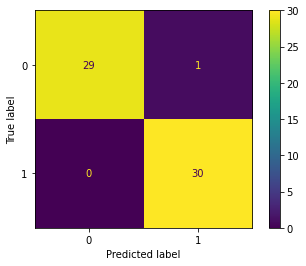

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, pred, labels=svm_rbf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot()
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=100, class_weight='balanced')

rf.fit(X, y)
pred = rf.predict(X)
print(metrics.classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



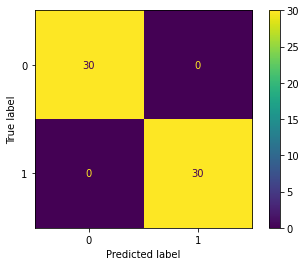

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

#KNN

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/MalwareDataset/csv_data/dataset.csv")
X = dataset.drop(["is_malicous"], axis=1)
y = dataset["is_malicous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 2, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       123
           1       0.87      0.89      0.88        82

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [ ]:
dump(clf, '/content/drive/MyDrive/MalwareDataset/Model/KNN/knn_clf.joblib')

['/content/drive/MyDrive/MalwareDataset/Model/KNN/knn_clf.joblib']

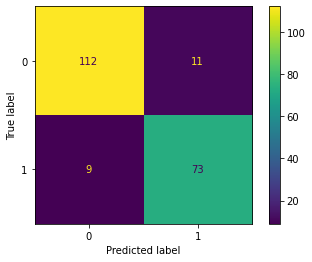

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

#KNN-test

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/MalwareDataset/Test/csv_data/dataset30_2.csv")
X = dataset.drop(["is_malicous"], axis=1)
y = dataset["is_malicous"]

In [ ]:
clf = load('/content/drive/MyDrive/MalwareDataset/Model/KNN/knn_clf.joblib')
pred = clf.predict(X)
print(metrics.classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



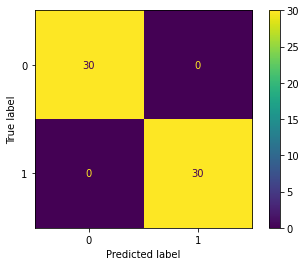

In [ ]:
cm = confusion_matrix(y, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

#LR

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/MalwareDataset/csv_data/dataset.csv")
X = dataset.drop(["is_malicous"], axis=1)
y = dataset["is_malicous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       123
           1       0.85      0.91      0.88        82

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205



In [ ]:
dump(clf, '/content/drive/MyDrive/MalwareDataset/Model/LR/lr_clf.joblib')

['/content/drive/MyDrive/MalwareDataset/Model/LR/lr_clf.joblib']

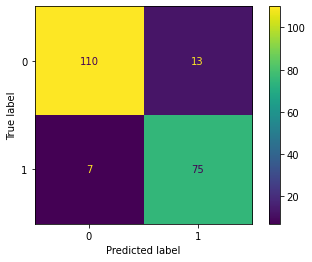

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

#LR-test

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/MalwareDataset/Test/csv_data/dataset30_2.csv")
X = dataset.drop(["is_malicous"], axis=1)
y = dataset["is_malicous"]

In [ ]:
clf = load('/content/drive/MyDrive/MalwareDataset/Model/LR/lr_clf.joblib')
pred = clf.predict(X)
print(metrics.classification_report(y, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



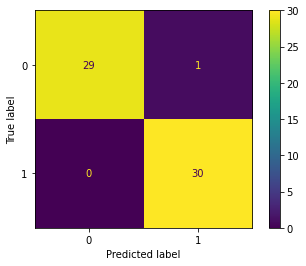

In [ ]:
cm = confusion_matrix(y, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()